 ## Test dataset (predict) -예측

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]   #꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float)  # Iris-Virginica

#------------------------------------------------------------------------------
#  LinearSVC Model사용의 경우
#  page 204
#------------------------------------------------------------------------------

svm_clf = Pipeline([
          ('scaler', StandardScaler()),
          ('linear_svc', LinearSVC(C=1, loss='hinge')),
          ])
svm_clf.fit(X, y)

print('\nIris Prediction(Linear SVC) = {}\n\n'.format(svm_clf.predict([[5.5, 1.7]])))


Iris Prediction(Linear SVC) = [1.]




In [2]:
#------------------------------------------------------------------------------
#  (kernel linear )SVC Model사용의 경우
#------------------------------------------------------------------------------

from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]   #꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float)  # Iris-Virginica

svm_clf = Pipeline([
          ('scaler', StandardScaler()),
          ('kernel_linear_svc', SVC(kernel='linear', C=1)),
          ])
svm_clf.fit(X, y)

print('\nIris Prediction(Kernel Linear SVC)= {}\n\n'.format(svm_clf.predict([[5.5, 1.7]])))
# SVM은 Logistic Regression과 달리 Clsaa에 대한 확률을 제공하지 않음


Iris Prediction(Kernel Linear SVC)= [1.]




In [3]:
#------------------------------------------------------------------------------
#   SGDClassifier Model사용의 경우
#------------------------------------------------------------------------------

from sklearn.linear_model import SGDClassifier

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]   #꽃잎 길이, 꽃잎 너비
y = (iris['target'] == 2).astype(np.float)  # Iris-Virginica

m = len(iris['target'])
C = 1
alpha = 1/(m*C)

SGD_clf = Pipeline([
          ('scaler', StandardScaler()),
          ('SGDClassifier', SGDClassifier(loss='hinge', alpha=alpha)),
          ])
SGD_clf.fit(X, y)

print('\nIris Prediction(SGDClassifier) = {}\n\n'.format(SGD_clf.predict([[5.5, 1.7]])))


Iris Prediction(SGDClassifier) = [1.]




# 비선형 SVM 분류 : make_moons dataset

C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


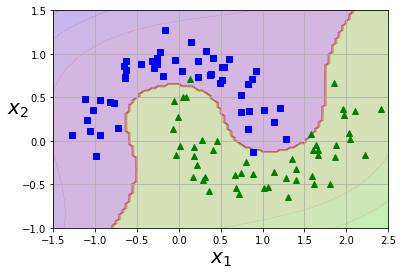

In [6]:
#------------------------------------------------------------------------------

#   비선형 SVM분류: make_moons DataaSet
#   PloynomialFeatures
#   StandardScaler, LinearSVC
#    page 206
#------------------------------------------------------------------------------
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
          ('poly_features', PolynomialFeatures(degree=3)),
          ('scaler', StandardScaler()),
          ('svm_clf', LinearSVC(C=10, loss='hinge')),
          ])
polynomial_svm_clf.fit(X, y)

#------------------------------------------------------------------------------
#  svm classifier로 make_moon dataset 그래프 그리기
#  page 206
#------------------------------------------------------------------------------
import numpy as np
from matplotlib import pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)#axes[0]부터 axes[1]까지 100개로 이루어진 숫자들
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #표현할 수 있는 모든 배열조합
    X = np.c_[x0.ravel(), x1.ravel()]# ravel 1차원 배열로 핀다.
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()


<function plot_predictions at 0x00000228830951E0>


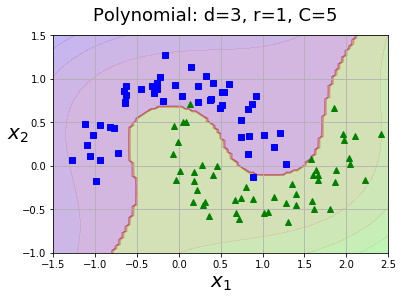

In [8]:
#------------------------------------------------------------------------------
#  다항식 kernel
#  page 207
# Polynomial: d=3, r=1, C=5
#------------------------------------------------------------------------------
from sklearn.svm import SVC
poly_kernel_svm__clf = Pipeline([
          ('scaler', StandardScaler()),
          ('svm_sclf', SVC(kernel='poly', degree=3, coef0=1, C=5)),
          ])
poly_kernel_svm__clf.fit(X, y)

fig, axes = plt.subplots(1)
fig.suptitle("Polynomial: d=3, r=1, C=5", fontsize=18)
plot_predictions(poly_kernel_svm__clf, [-1.5, 2.5, -1, 1.5])
print(plot_predictions)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

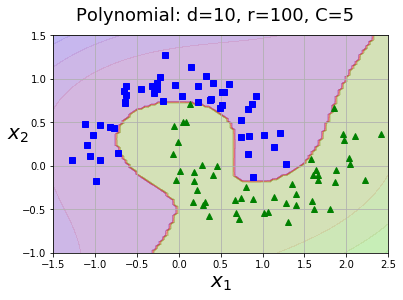

In [9]:
#------------------------------------------------------------------------------
#  다항식 kernel
#  page 207
# Polynomial: d=10, r=100, C=5
#------------------------------------------------------------------------------
from sklearn.svm import SVC
poly_kernel_svm__clf = Pipeline([
          ('scaler', StandardScaler()),
          ('svm_sclf', SVC(kernel='poly', degree=10, coef0=100, C=5)),
          ])
poly_kernel_svm__clf.fit(X, y)

fig, axes = plt.subplots(1)
fig.suptitle("Polynomial: d=10, r=100, C=5", fontsize=18)
plot_predictions(poly_kernel_svm__clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## 회귀

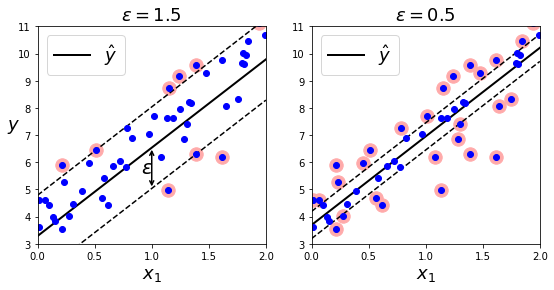

In [10]:
#------------------------------------------------------------------------------
#  SVM회귀
#  그림 5-10 Graph
#  page 212
#------------------------------------------------------------------------------
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

np.random.rand(5)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

svm_reg1 = LinearSVR(epsilon=1.5)
svm_reg2 = LinearSVR(epsilon=0.5)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
     y_pred = svm_reg.predict(X)
     off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
     return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
     x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
     y_pred = svm_reg.predict(x1s)
     plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
     plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
     plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
     plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
     plt.plot(X, y, "bo")
     plt.xlabel(r"$x_1$", fontsize=18)
     plt.legend(loc="upper left", fontsize=18)
     plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
         '', xy=(eps_x1, eps_y_pred), xycoords='data',
         xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
         textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
     )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


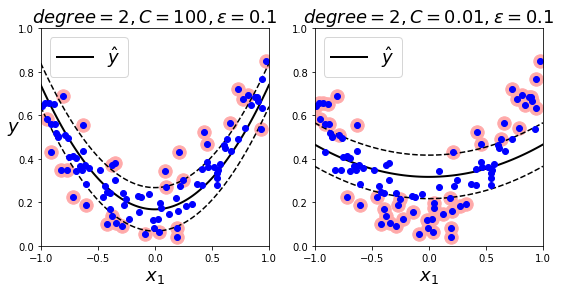

In [11]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

#------------------------------------------------------------------------------
#  SVM회귀: 2차 다항커널을 이용한 SVM회귀
#  Graph Code(그림 5-11)
#  page 213
#------------------------------------------------------------------------------
from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [12]:
 #------------------------------------------------------------------------------
 #  SVM회귀: 2차 다항커널을 이용한 SVM회귀
 #  page 213
 #------------------------------------------------------------------------------

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

C:\Users\smart\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)